In [1]:
%reload_ext autoreload
%autoreload 2

import os
import pickle
import json

import librosa
import math

import hmmlearn.hmm as hmm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from preprocessing import get_mfcc

from utils import  get_all_words, get_word

import seaborn as sns
import matplotlib.pyplot as plt


# 1. Params

In [2]:
class_names = get_all_words(tiny=True)
model_path = '../models/same_state_3_mix_6'

# 2. Testing

In [3]:
def load_model(model_path: str):
    models = {}
    for key in class_names:
        name = f"{model_path}/model_{key}.pkl"
        with open(name, 'rb') as file:
            models[key] = pickle.load(file)
    return models

In [4]:
models = load_model(model_path)

In [5]:
def predict(file_name: str):
    # Predict
    record_mfcc = get_mfcc(file_name)
    scores = [models[cname].score(record_mfcc) for cname in class_names]
    predict_word = np.argmax(scores)
    predict_word = class_names[predict_word]
    return predict_word

In [6]:
words = get_all_words(tiny=True)

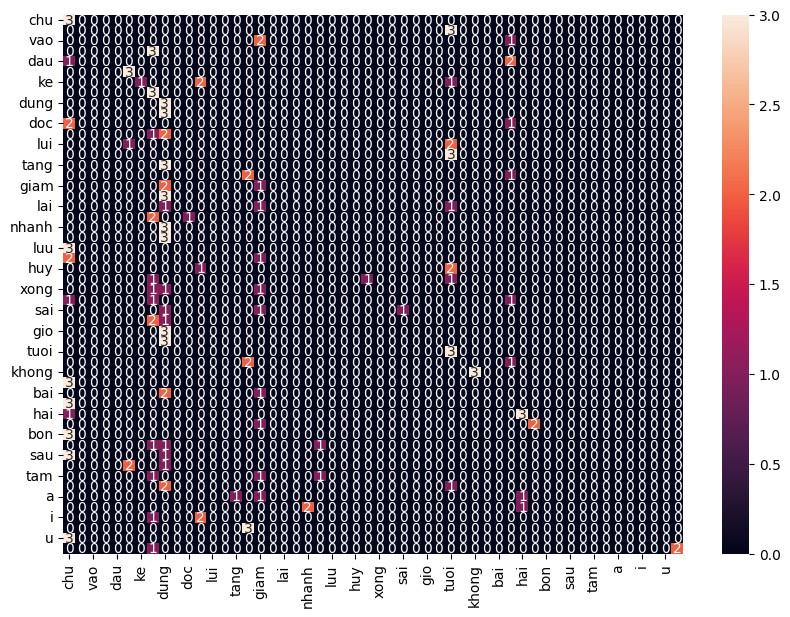

In [7]:
y_pred = []
y_true = []

for word in words:
    files = os.listdir(f"../datasets_testing/{word}")
    for file in files:
        y_true.append(word)
        file_name = f"../datasets_testing/{word}/{file}"
        predict_word = predict(file_name)
        y_pred.append(predict_word)

conf_matrix = confusion_matrix(y_true, y_pred, labels=words)
df_cm = pd.DataFrame(conf_matrix, index=words, columns=words)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

plt.show()

In [8]:
arcuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
print(f"Accuracy    : {arcuracy}")

Accuracy    : 0.1949685534591195
